In [1]:
# 🔹 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
df = pd.read_csv('/content/sentimentdataset.csv')

In [4]:
# Initial Data Check
print("Sample data:")
print(df.head())

Sample data:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweet

In [6]:
# Preprocess Text Column

text_column_name = 'Text'
if text_column_name not in df.columns:
    raise KeyError(f"Column '{text_column_name}' not found in the DataFrame. Please check your dataset or update 'text_column_name'.")

df[text_column_name] = df[text_column_name].astype(str)
df['text_clean'] = df[text_column_name].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [8]:
# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['text_clean'].apply(analyze_sentiment)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [10]:
# Extract Trending Keywords
all_words = ' '.join(df['text_clean'])
word_freq = Counter(all_words.split())
common_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

<ipython-input-11-7aca31073625>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


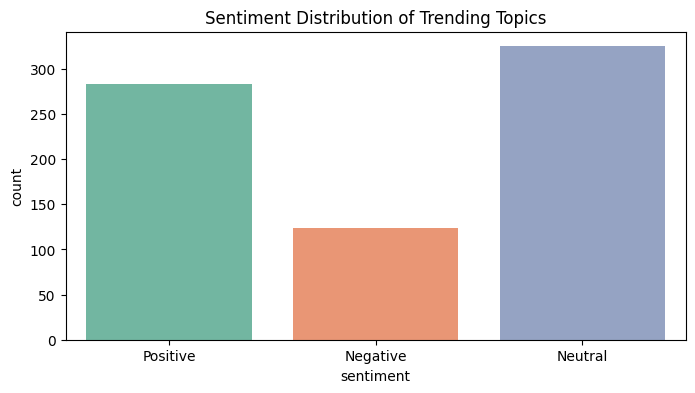

In [11]:
# Visualizations
# Sentiment Distribution Plot
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution of Trending Topics')
plt.show()

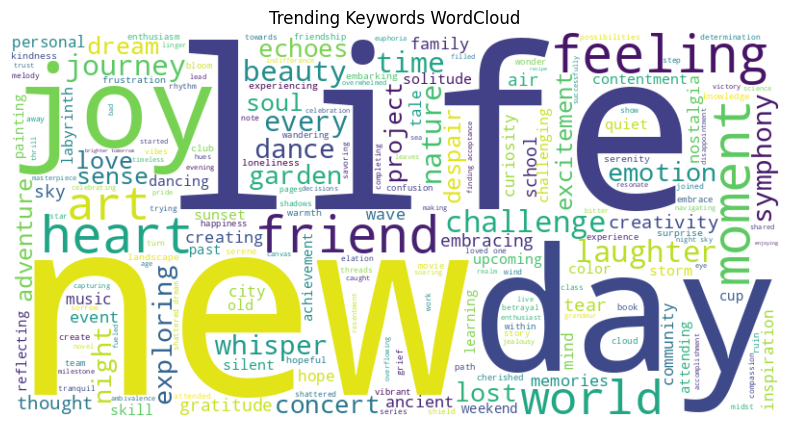

In [12]:
# Word Cloud of Trending Topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trending Keywords WordCloud')
plt.show()

In [13]:
#  Export for Dashboarding
df[[text_column_name, 'sentiment_score', 'sentiment']].to_csv('sentiment_analysis_output.csv', index=False)
common_words_df.to_csv('trending_keywords.csv', index=False)